In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
plt.rcParams.update({'font.size': 20})

# Problem#1. Newman 7.3: Detecting periodicity

$\textbf{Part a}$



$\textbf{Ploting Sunspots as a function of time from the given data:}$

In [3]:
Sunspots=np.genfromtxt('sunspots.txt')

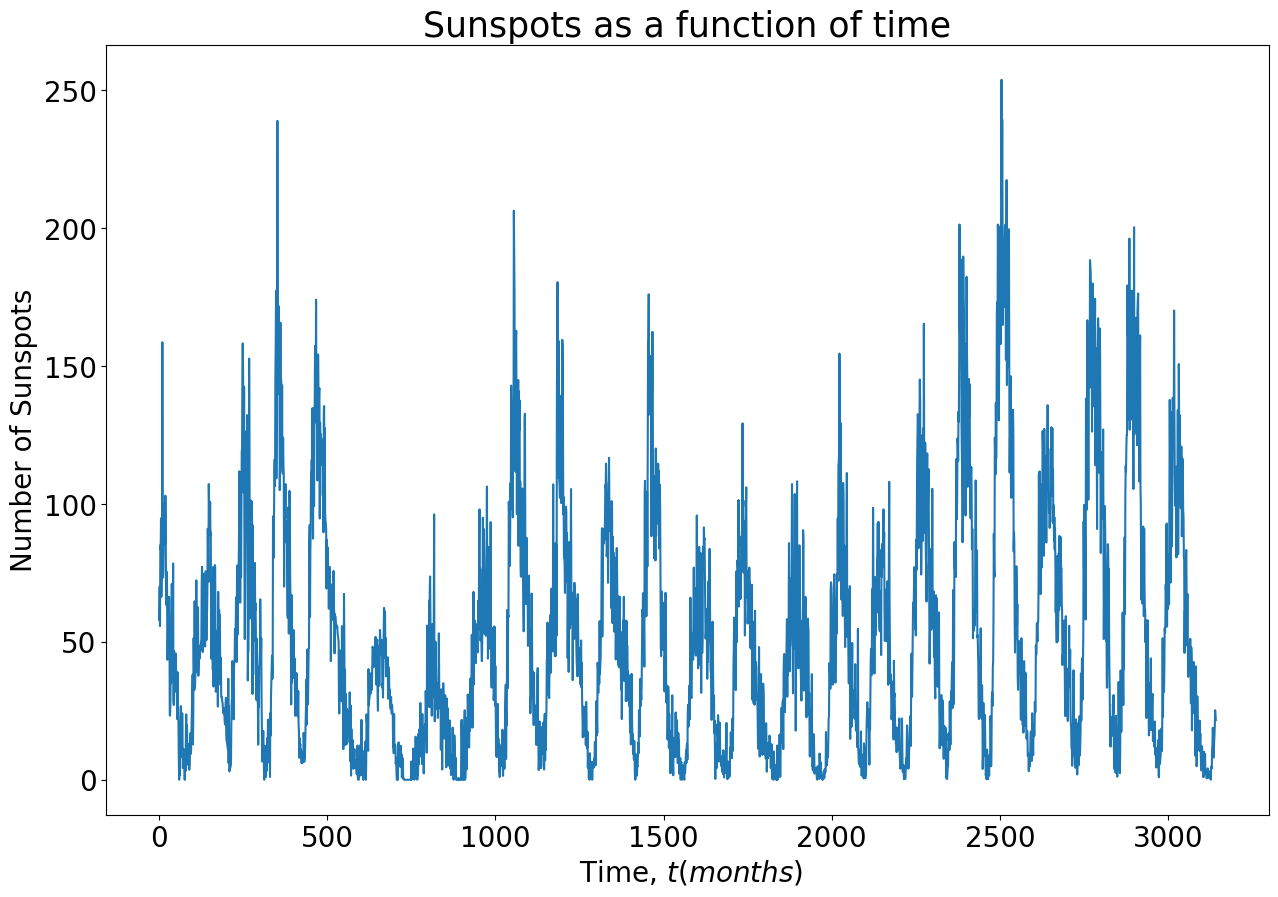

In [4]:
fig = plt.figure(figsize=(15,10))
plt.xlabel(" Time, $t(months)$")
plt.ylabel('Number of Sunspots')
plt.title('Sunspots as a function of time', fontsize=25)
x_T=Sunspots[:,0]
y=Sunspots[:,1]
plt.plot(x_T,y)
plt.show()

It's not clear what should be the time period of cycle for these snapshots. Let's draw separately for first 200 and 300 months to make it clear.

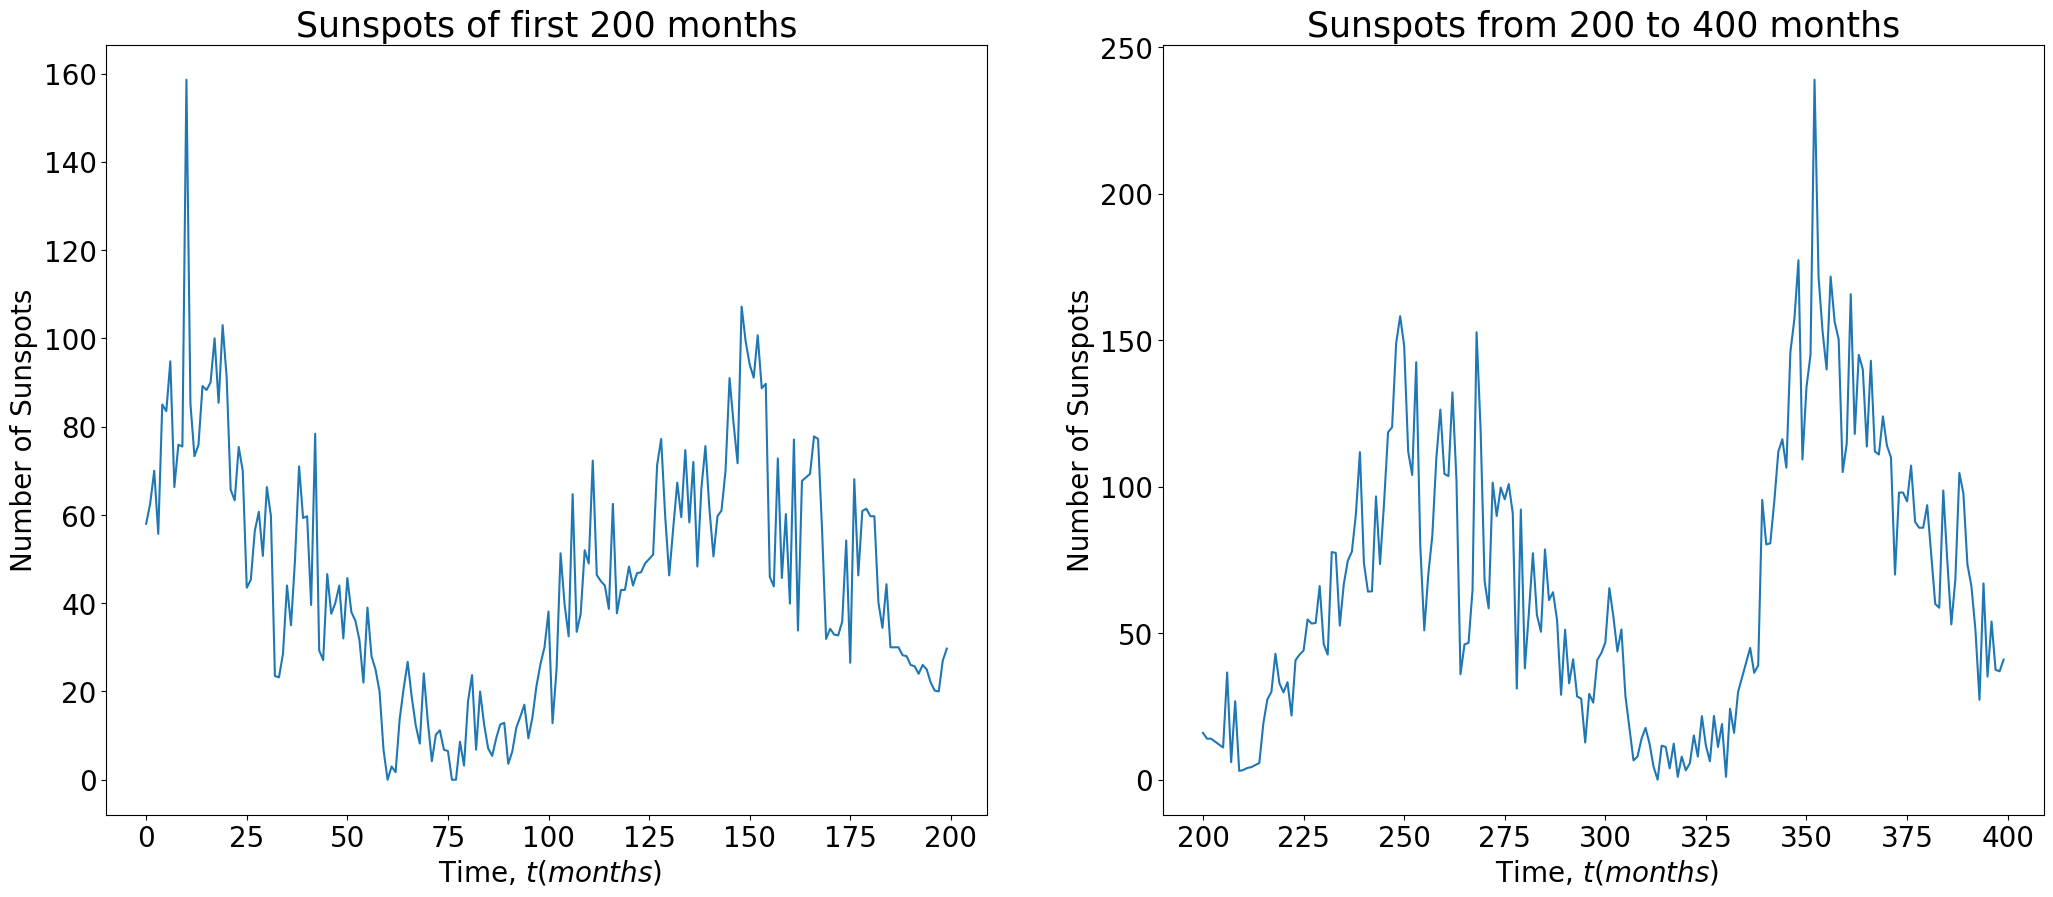

In [5]:
fig = plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.xlabel(" Time, $t(months)$")
plt.ylabel('Number of Sunspots')
plt.title('Sunspots of first 200 months', fontsize=25)
x_t=Sunspots[0:200,0]
y_x=Sunspots[0:200,1]
plt.plot(x_t,y_x)

plt.subplot(1,2,2)
plt.xlabel(" Time, $t(months)$")
plt.ylabel('Number of Sunspots')
plt.title('Sunspots from 200 to 400 months', fontsize=25)
x_t=Sunspots[200:400,0]
y_x=Sunspots[200:400,1]
plt.plot(x_t,y_x)
plt.show()

Now, I can say an estimated $\textbf{length of cycle should be around 125 months}$. By carefully looking at the plots, after every 125 months number of snapshots goes down to nearly zero

$\textbf{Part b}$



$\textbf{Calculating the discrete Fourier transform of the sunspot data:}$

According to conventional definition of discrete Fourier transform;
$$C_k=\sum_{n=0}^{N-1}Y_n exp\left(-\frac{i2\pi kn}{N}\right)$$

In [6]:
## From textbook:

def dft(y):   
    N=len(y)
    c=np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

In [7]:
start=time()
C_k=dft(y)  ### C_k here are Fourier coefficients for the Sunspots data
end=time()
print(('Run time for this cell is ',end-start, 'seconds'))

('Run time for this cell is ', 8.65531301498413, 'seconds')


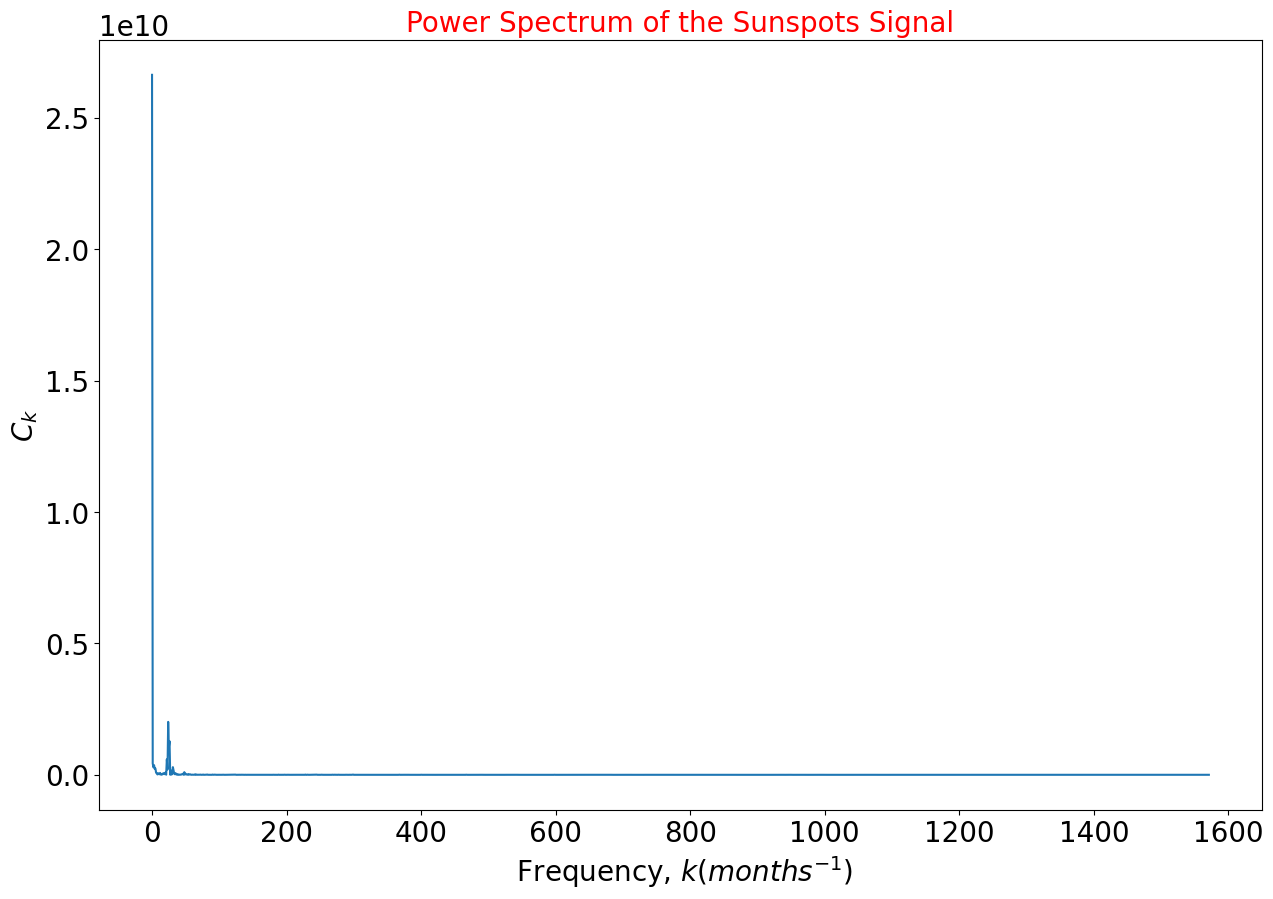

In [8]:
c_k_square=(abs(C_k))**2
fig = plt.figure(figsize=(15,10))
plt.xlabel(" Frequency, $k(months^{-1})$")
plt.ylabel('$C_k$')
plt.title('Power Spectrum of the Sunspots Signal', fontsize=20, color='red')
plt.plot(c_k_square)
plt.show()

Yes, there is a peak at non-zero value of k, let's zoom in at that area

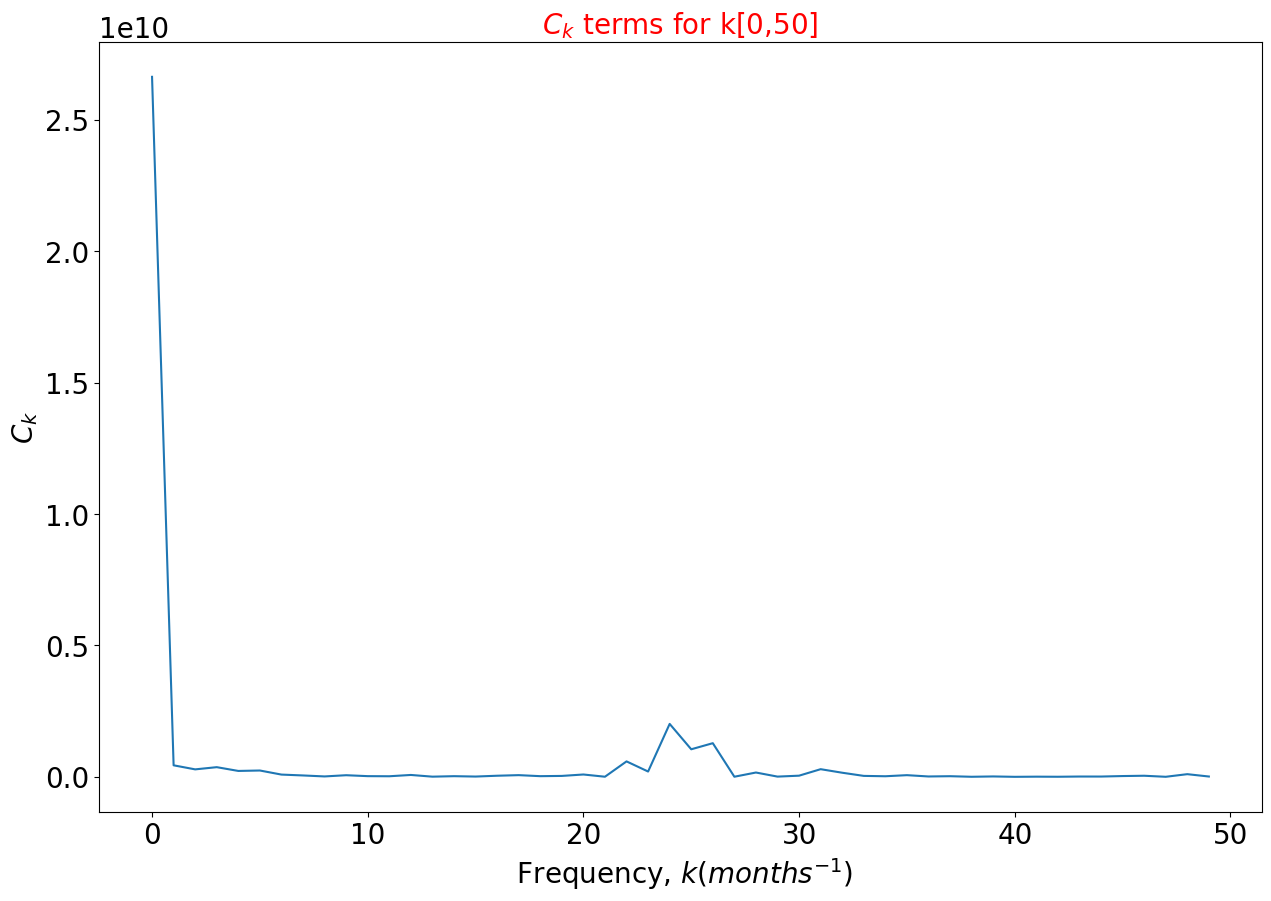

In [9]:
fig = plt.figure(figsize=(15,10))
plt.xlabel(" Frequency, $k(months^{-1})$")
plt.ylabel('$C_k$')
plt.title('$C_k$ terms for k[0,50]', fontsize=20, color='red')
plt.plot(c_k_square[0:50])
plt.show()

$\textbf{Part c}$

Finding the approximate value of non-zero k to which the peak corresponds

Let's zoom in between 20 and 30 to look closely at the peak

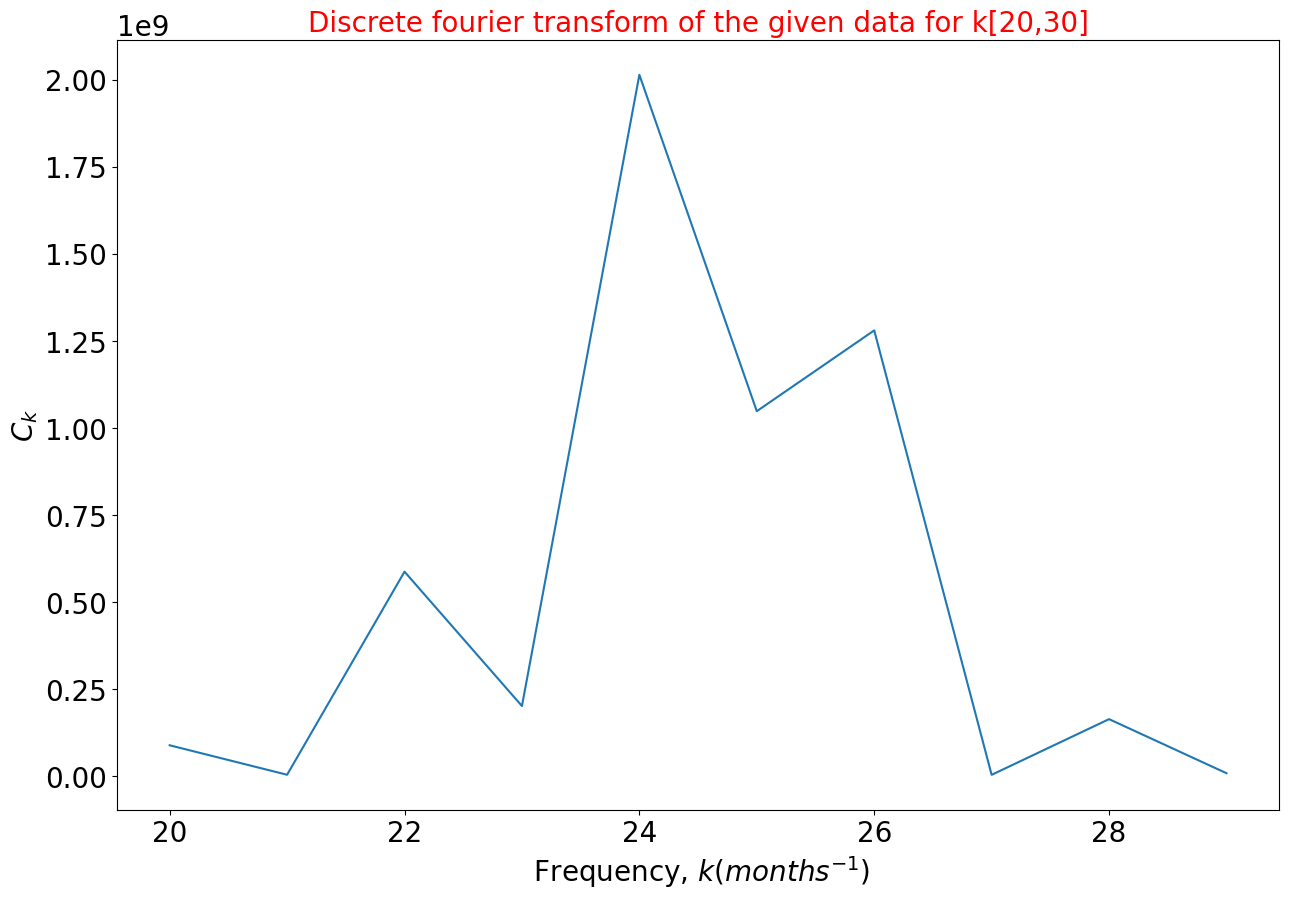

In [10]:
fig = plt.figure(figsize=(15,10))
plt.xlabel(" Frequency, $k(months^{-1})$")
plt.ylabel('$C_k$')
plt.title('Discrete fourier transform of the given data for k[20,30]', fontsize=20, color='red')
plt.plot(np.arange(20,30,1),c_k_square[20:30])
plt.show()

So by craefully looking at the plot I can say that the max value is at $\textbf{k=24}$. Because Frequency is given by $f=1/T$ and $f=k/N$ because in DFT argument of exponents are $(\frac{2\pi k}{N})n$, so the time period of sine wave is $T=N/k$. Although by the definition of time period of sine-wave in the form $\sin(fx)$, it is given by $T=2\pi/f$, here we have our argument as  $2\pi k/N$ which again makes $T=N/k$

In [11]:
k=24
Time_period=len(y)/k      ### T = N/k      (here, N=3143 i.e total number of months)
print('Time period of sine wave for "k=24" =',Time_period,'months')

Time period of sine wave for "k=24" = 130.95833333333334 months


Which is almost near to the guess I made in part a which was 125 months of cycle. 

# Problem#2: Newman 7.4: Fourier filtering and smoothing

$\textbf{Part a}$

Importing data from the given dow.txt file and plotting it.

In [12]:
Dow_Jones=np.genfromtxt('dow.txt')

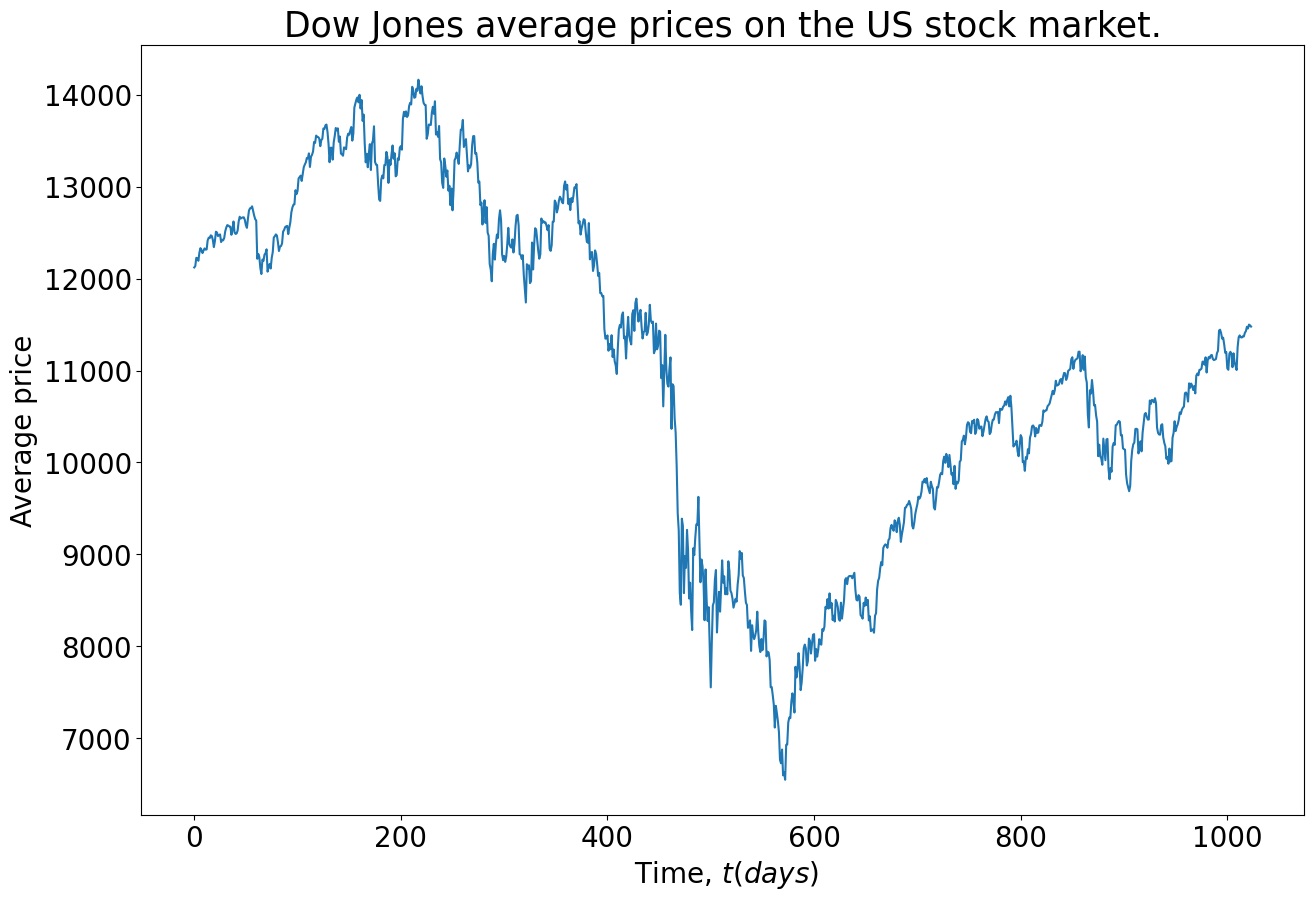

In [13]:
fig = plt.figure(figsize=(15,10))
plt.xlabel(" Time, $t(days)$")
plt.ylabel('Average price')
plt.title('Dow Jones average prices on the US stock market.', fontsize=25)
plt.plot(Dow_Jones)
plt.show()

$\textbf{Part b}$

Calculating the coefficients of the discrete Fourier transform of the Dow Jones data using the function $\textbf{rfft}$ from $\textbf{numpy.fft}$

In [14]:
C_k_jones=np.fft.rfft(Dow_Jones)   ##C_k_jones are coffiecients of DFT of Dow Jones data

In [15]:
print('Length of C_k terms of Dow Jones data = ',len(C_k_jones))
print('Length of Dow Jones data  i.e. y[n] terms= ',len(Dow_Jones))
type(C_k_jones),len(C_k_jones)   ###---rfft produced an complex valued array of length N/2+1
                                                               

Length of C_k terms of Dow Jones data =  513
Length of Dow Jones data  i.e. y[n] terms=  1024


(numpy.ndarray, 513)

$\textbf{Part c}$

Now setting all but the first 10% of the elements of this array (C_k_jones) to zero.

In [16]:
C_k_10_percent=np.copy(C_k_jones)   ### Creating copy of the cofficients of DFT of Dow Jones data

In [17]:
### Setting all but first 10% of the elements to zero
C_k_10_percent=np.copy(C_k_jones)
for i in range(len(C_k_10_percent)):
    if i>0.1*len(C_k_10_percent):
        C_k_10_percent[i]=0
        

In [18]:
##After 10 percent, the next elements will all be zero  
C_k_10_percent[int(0.1*len(C_k_10_percent))],C_k_10_percent[int(0.1*len(C_k_jones))+1]                                                                                     ## 

((-13876.302584015786-1446.3567396537637j), 0j)

$\textbf{Part d}$

Calculating the inverse Fourier transform of the resulting array, zeros and all, using
the function irfft, and then plotting it on the same graph as the original data. 

In [19]:
Inv_trsfm_C_k_jones=np.fft.irfft(C_k_10_percent)  ## Inverse transform of 10% of C_k_jones terms

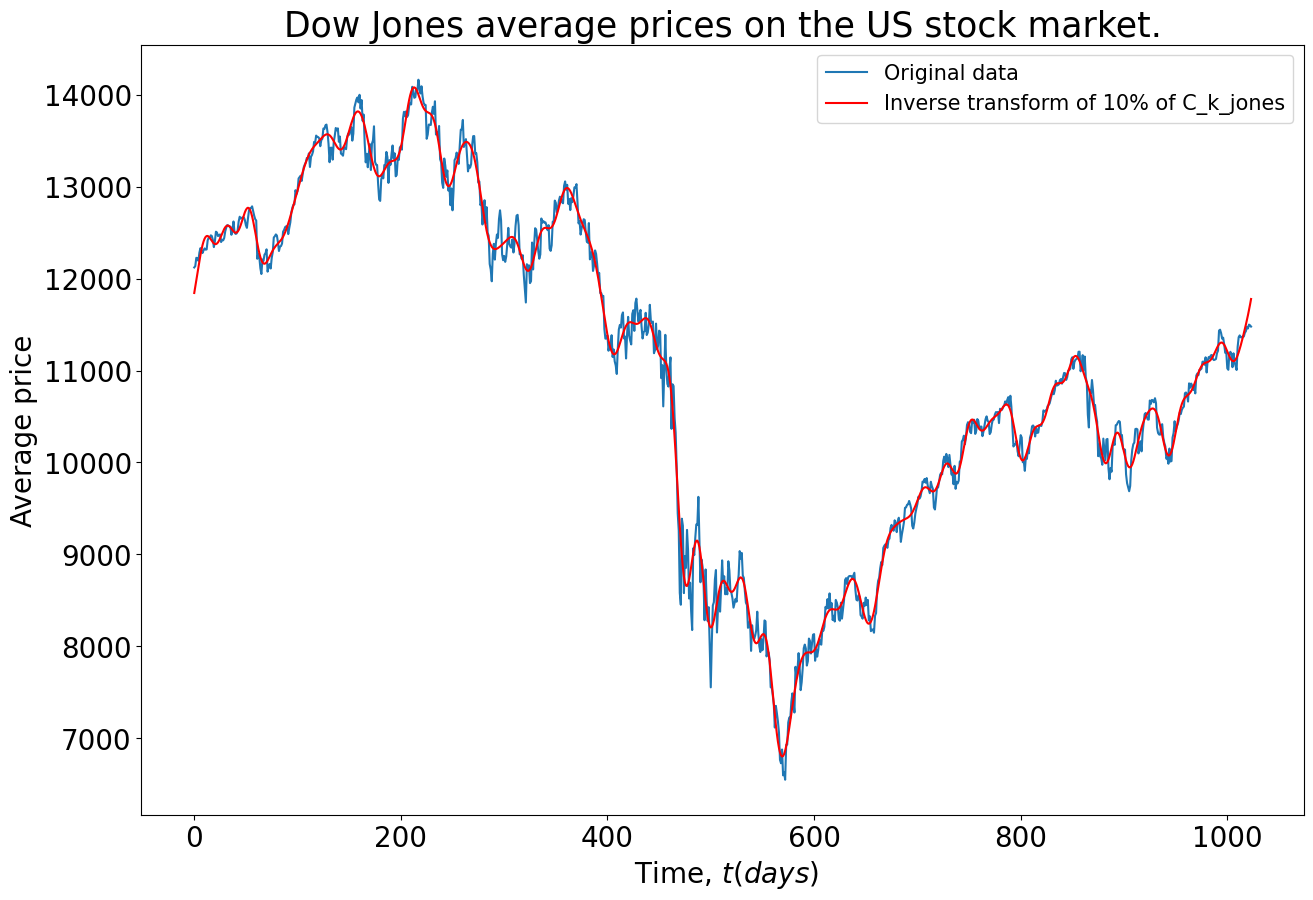

In [20]:
fig = plt.figure(figsize=(15,10))
plt.xlabel(" Time, $t(days)$")
plt.ylabel('Average price')
plt.title('Dow Jones average prices on the US stock market.', fontsize=25)
plt.plot(Dow_Jones,label='Original data')
plt.plot(Inv_trsfm_C_k_jones,label='Inverse transform of 10% of C_k_jones',color='red')
plt.legend(loc='best',fontsize=15)
plt.show()

$\textbf{Comment:}$

After setting last $90\%$ term of the C_k_jones array to zero, I see the inverse transform data (red curve) is more smooth than original data(blue curve). The reason for that is because we ignored higher frequencies.

$\textbf{Part e}$

Now setting all but the first $2\%$ of the coefficients i.e. C_k_jones to zero, then plotting the resulting curve

In [21]:
C_k_2_percent=np.copy(C_k_jones)
for i in range(len(C_k_2_percent)):
    if i>0.02*len(C_k_2_percent):
        C_k_2_percent[i]=0

In [22]:
Inv_trsfm_C_k_jones_2=np.fft.irfft(C_k_2_percent)  ### Inverse transform of 2% of C_k_jones terms 

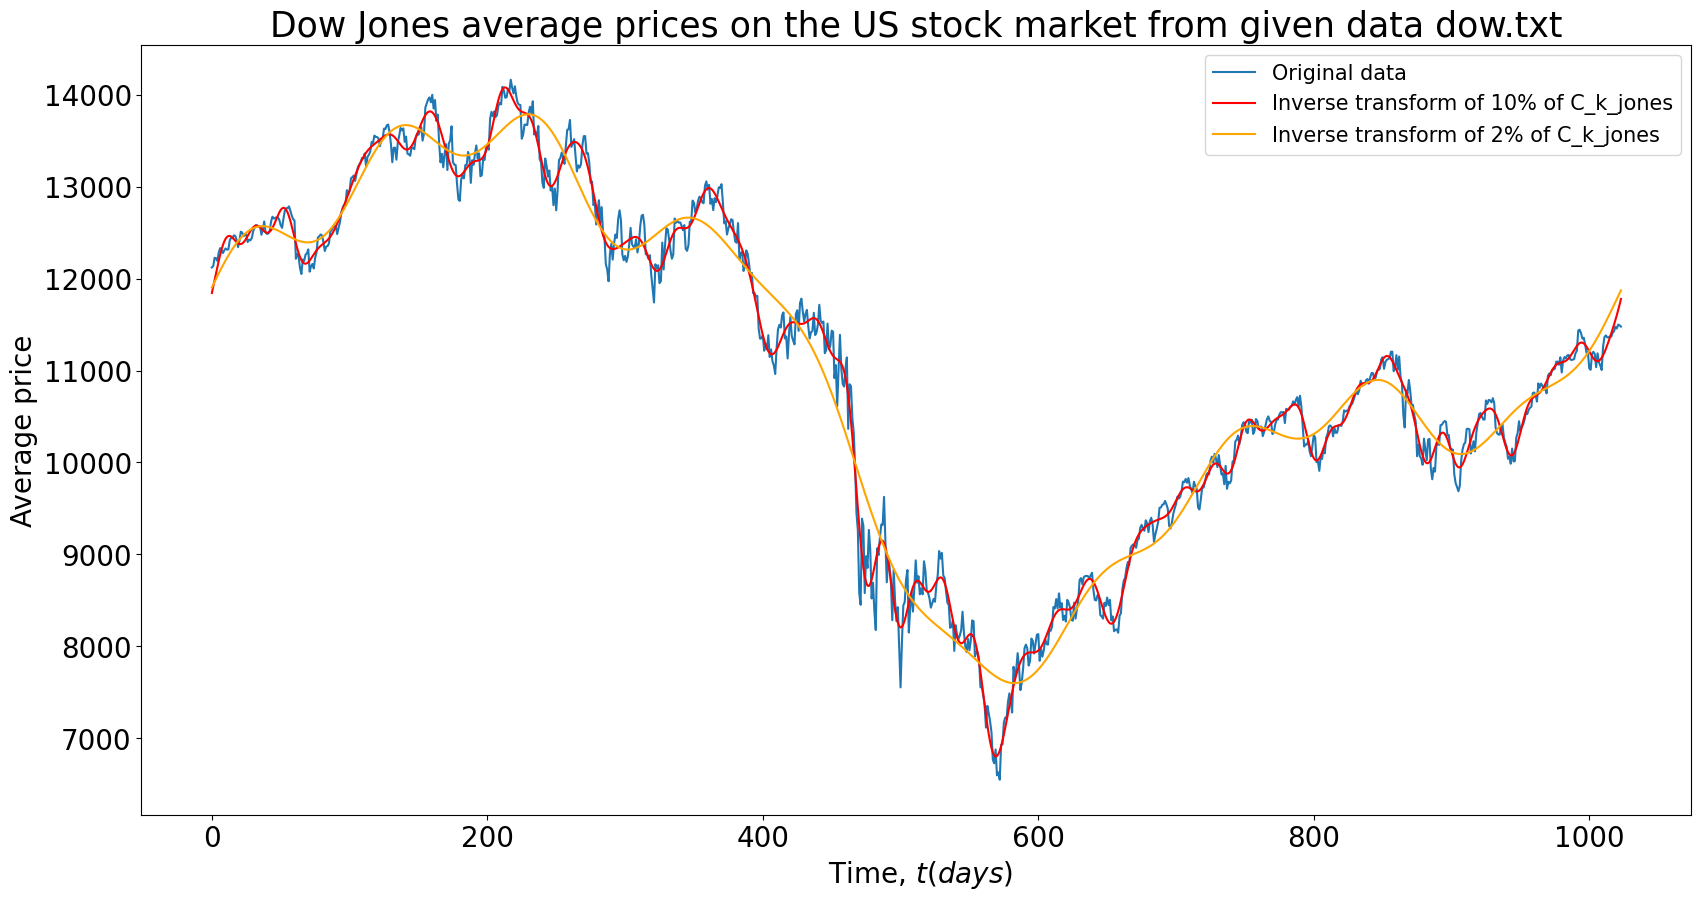

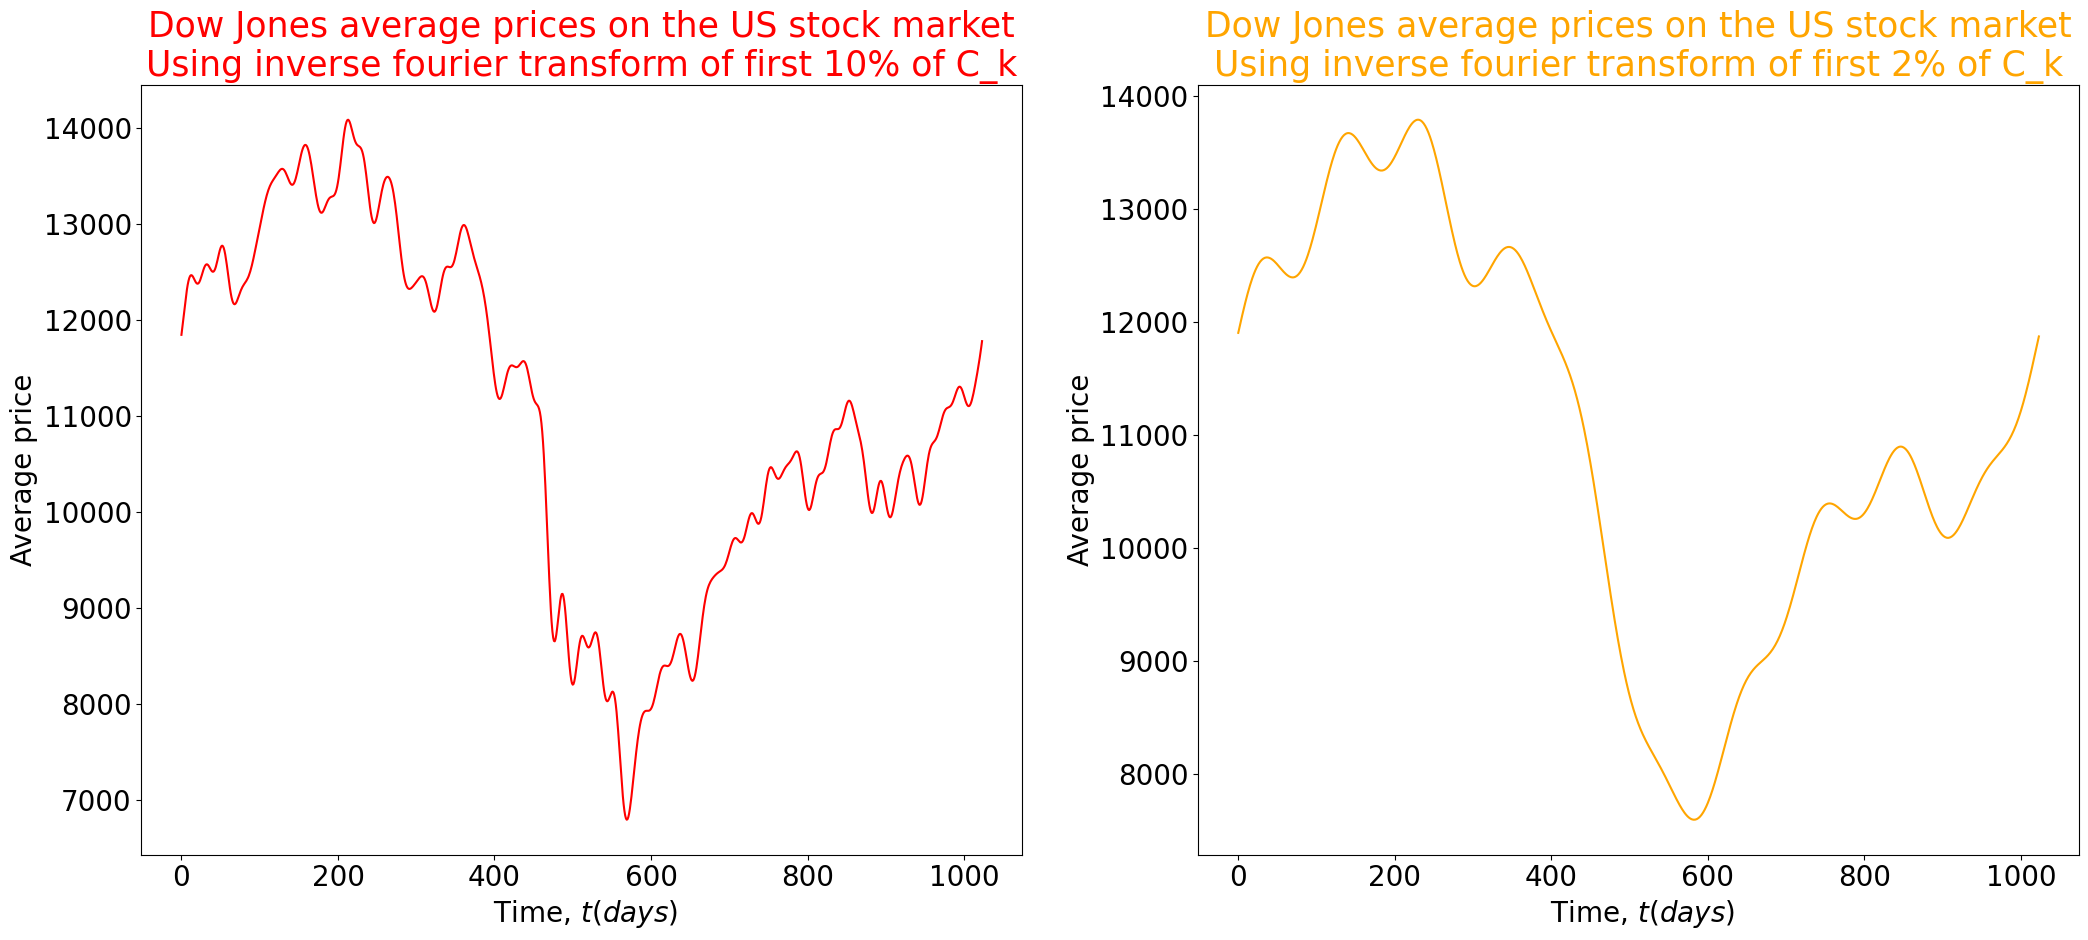

In [23]:
fig = plt.figure(figsize=(20,10))
plt.xlabel(" Time, $t(days)$")
plt.ylabel('Average price')
plt.title('Dow Jones average prices on the US stock market from given data dow.txt', fontsize=25)
plt.plot(Dow_Jones,label='Original data')
plt.plot(Inv_trsfm_C_k_jones,color='red',label='Inverse transform of 10% of C_k_jones')
plt.plot(Inv_trsfm_C_k_jones_2,color='orange',label='Inverse transform of 2% of C_k_jones')
plt.legend(loc='best',fontsize=15)

fig1 = plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.xlabel(" Time, $t(days)$")
plt.ylabel('Average price')
plt.title('Dow Jones average prices on the US stock market\nUsing inverse fourier transform of first 10% of C_k', fontsize=25,color='red')
plt.plot(Inv_trsfm_C_k_jones,color='red')

plt.subplot(1,2,2)
plt.xlabel(" Time, $t(days)$")
plt.ylabel('Average price')
plt.title('Dow Jones average prices on the US stock market\nUsing inverse fourier transform of first 2% of C_k', fontsize=25,color='orange')
plt.plot(Inv_trsfm_C_k_jones_2,color='orange')
plt.show()


$\textbf{Comments:}$

We calculated coeffients $C_k$ using Fourier transform of the given data of Dow Jones which I named here C_k_jones. After keeping only first $2\%$ of $C_k$ terms, as we can see the orange curve is lot smoother than the blue curve (original data of Dow jones stock price). Orange curve is also smoother than red curve which is data regenerated from first $10\%$ of $C_k$ terms.

Overall I can say because we ignored the higher frequencies in C_k_jones which were responsible for the rapid fluctuations in the curve which is why our curve is getting smoother and smoother.


# Problem#3– Newman 7.9: Image deconvolution

$\textbf{Part a}$

Plotting the picture from the file 'blur.txt'

In [24]:
Blur_photo=np.genfromtxt('blur.txt')

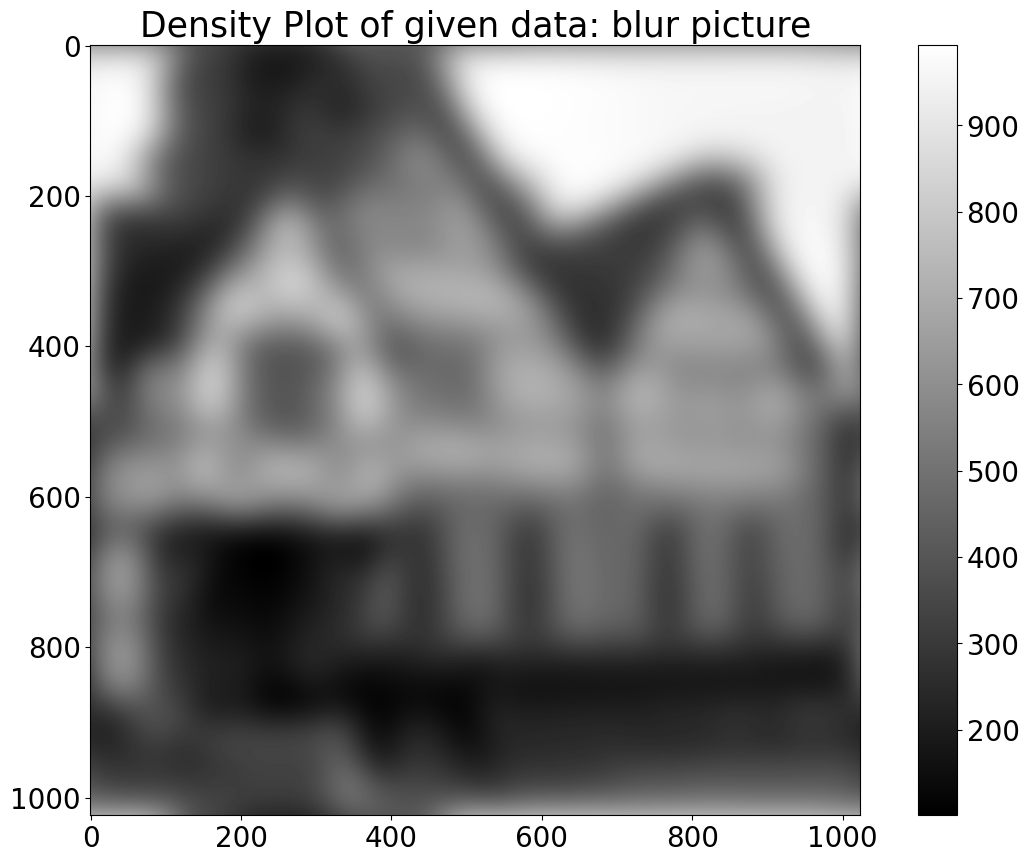

In [25]:
fig = plt.figure(figsize=(15,10))
plt.title('Density Plot of given data: blur picture', fontsize=25)
plt.imshow(Blur_photo,'gray')
plt.colorbar()
plt.show()

$\textbf{Part b}$

Creating an array, of the same size as the photo, containing a grid of samples from drawn from the Gaussian $f (x, y)=exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$ given in the problem with $\sigma = 25$

In [26]:
def Gaussian(x,y,sigma):
    return np.exp(-(x**2+y**2)/(2*sigma**2))

In [27]:
def point_spread_function(N,M,sigma):
    gaussian=np.zeros((N,M))
    ## Here, gaussian is an N X N matrix of zeros: a 2D grid where at each location Gaussian(x,y,sigma) 
    ## will be evaluated. To create this function I considered my i index as my y-cordinate and j index 
    ## as my x-cordinate, because for elements in an array such  A[i,j], i index moves from top to bottom
    ##  and, j index moves from left to right.
    for y in range(N//2):
        for x in range(M//2):
            gaussian[y, x] =  Gaussian(y,x,sigma) ### Evaluating Gaussian at every point in the upper left quadrant
            gaussian[y, -x]=gaussian[y,x]         ###Imaging upper left quadrant to upper right qudrant
            
            gaussian[-y, -x] = gaussian[y,x]      ### Imaging upper half(both upper quadrant) to lower half
            gaussian[-y, x]=gaussian[y,x]
    return gaussian

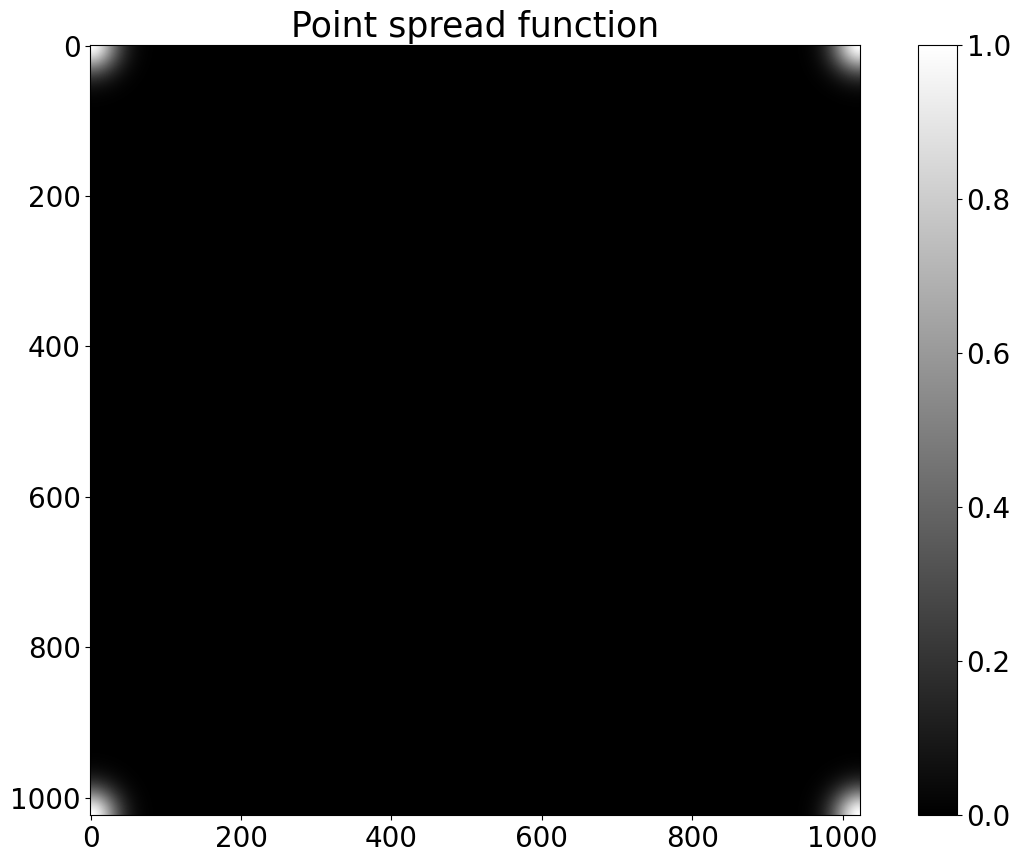

Run time for this cell is  1.2455239295959473 seconds


In [28]:
start=time()
Point_spread_fnc=point_spread_function(1024,1024,25)
fig = plt.figure(figsize=(15,10))
plt.title('Point spread function', fontsize=25)
plt.imshow(Point_spread_fnc,'gray')
plt.colorbar()
plt.show()
end=time()
print('Run time for this cell is ',end-start, 'seconds')

$\textbf{Part c:}$


Combine your two programs and add Fourier transforms using the functions rfft2\
and irfft2 from numpy.fft, to make a program that does the following:\
i. Reads in the blurred photo\
ii. Calculates the point spread function\
iii. Fourier transforms both\
iv. Divides one by the other\
v. Performs an inverse transform to get the unblurred photo\
vi. Displays the unblurred photo on the screen


$\textbf{Right now I am doing all the above parts in different cells, I will define a function in the end that would do all (i) to (vi)}$\
$\textbf{together, with input of image data and $\sigma$ of point spread function}$

In [29]:
##Fourier transforming both image and point spread function: step (iii)
FT_image=np.fft.rfft2(Blur_photo)                ### Fourier transform of the given image
FT_point_spread=np.fft.rfft2(Point_spread_fnc)   ### Fourier transform of point spread function

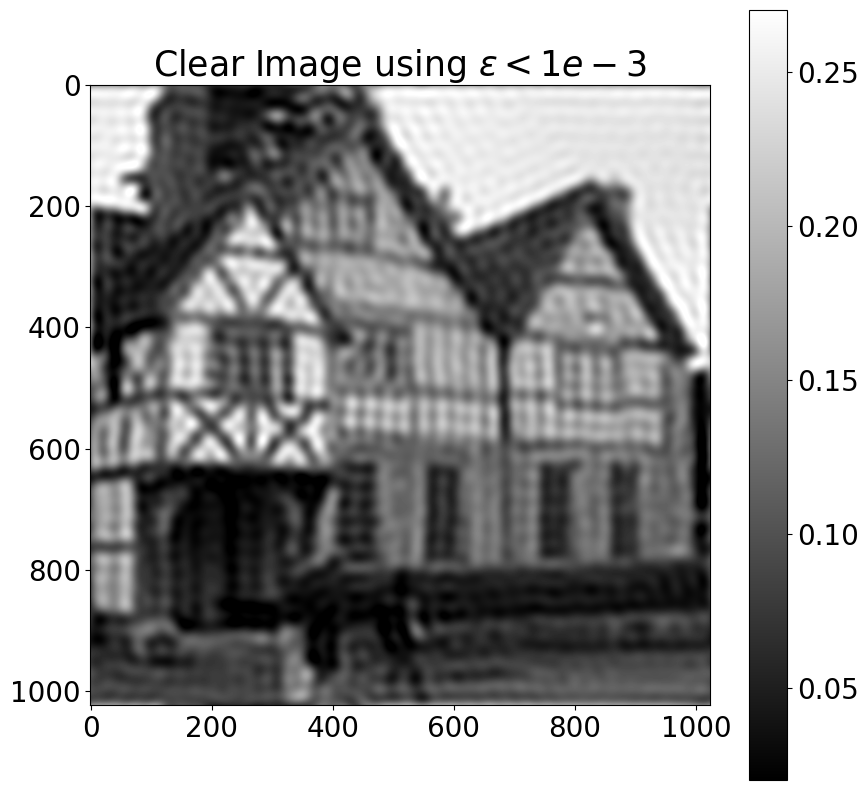

In [30]:
## Now creating image: step (iv) to (vi)

Image_1=np.zeros((1024,513),complex)

##Dividing Fourier transform of the blur image by Fourier transform of point spread function 
    
for i in range(1024):
    for j in range(513):
        if FT_point_spread[i,j]<1e-3:   #As suggested in the problem to take care of infinite values while deviding 
            Image_1[i,j]=FT_point_spread[i,j]
        else:
            Image_1[i,j]=FT_image[i,j]/FT_point_spread[i,j]

            ##In the next cell I will vary this epsilon to see other cases   

### Now, taking inverse Fourier transform of the Image_1
Inv_trsfm_Image_1=np.fft.irfft2(Image_1)
fig = plt.figure(figsize=(10,10))
plt.title('Clear Image using $\epsilon<1e-3$', fontsize=25)
plt.imshow(abs(Inv_trsfm_Image_1),'gray',vmin=.02,vmax=0.27)
plt.colorbar()
plt.show()

Plotting a different case using $\epsilon<10^{-5}$ 

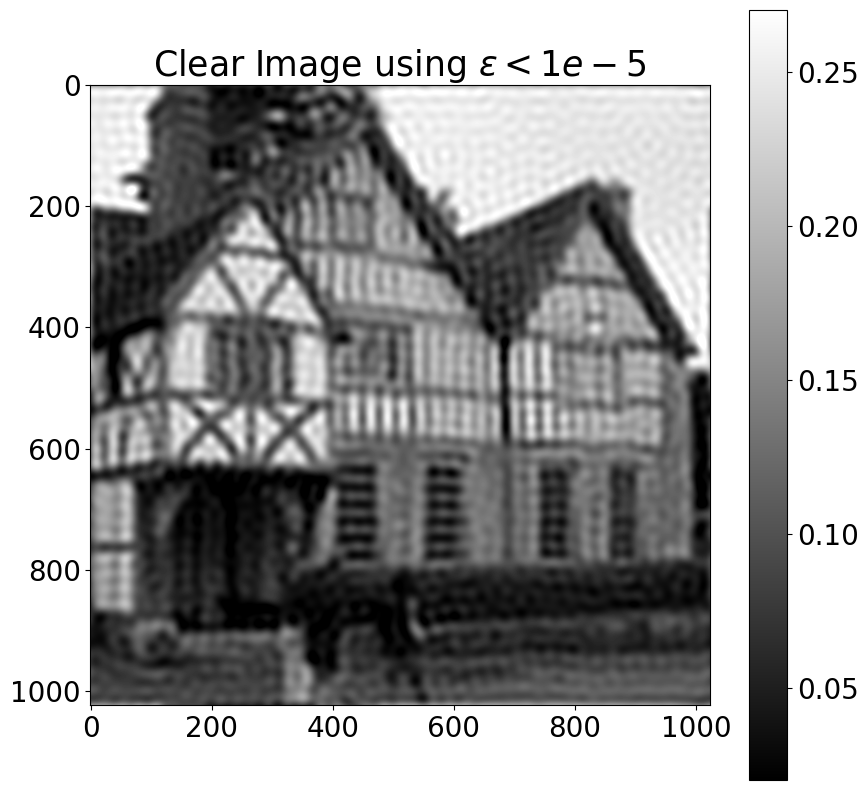

In [31]:
Image_2=np.zeros((1024,513),complex)
for i in range(1024):
    for j in range(513):
        if FT_point_spread[i,j]<1e-5:
            Image_2[i,j]=FT_point_spread[i,j]
        else:
            Image_2[i,j]=FT_image[i,j]/FT_point_spread[i,j]
            
### Now, taking inverse Fourier transform of the Image_2
Inv_trsfm_Image_2=np.fft.irfft2(Image_2)  
fig = plt.figure(figsize=(10,10))
plt.title('Clear Image using $\epsilon<1e-5$', fontsize=25)
plt.imshow(abs(Inv_trsfm_Image_2),'gray',vmin=.02,vmax=0.27)
plt.colorbar()
plt.show()

This is the limit of $\epsilon$, beyond this point, we start getting real bright spots in the picture

# In the below cell, as asked in problem I also made a program that does following all together:
i. Reads in the blurred photo\
ii. Calculates the point spread function\
iii. Fourier transforms both\
iv. Divides one by the other\
v. Performs an inverse transform to get the unblurred photo\
vi. Displays the unblurred photo on the screen\

In [32]:
def Go_from_blur_to_clear(Blur_picture,sigma):
    point_spread_function(len(Blur_picture[0,:]),len(Blur_picture[:,0]),sigma)
    Image=np.zeros((len(Blur_picture[0,:]),len(Blur_picture[0,:])//2+1),complex)
    FT_image=np.fft.rfft2(Blur_picture)                ### Fourier transform of image
    FT_point_spread=np.fft.rfft2(point_spread_function(len(Blur_picture[0,:]),len(Blur_picture[:,0]),sigma))   
    
    ##Dividing Fourier transform of the blur image by Fourier transform of point spread function 
    
    for i in range(1024):
        for j in range(513):
            if FT_point_spread[i,j]<1e-5:#As suggested in problem to take care of infinite values while deviding 
                Image[i,j]=FT_point_spread[i,j]
            else:
                Image[i,j]=FT_image[i,j]/FT_point_spread[i,j]

            
    ### Now, taking inverse Fourier transform of the result from above loop
    Inv_trsfm_Image=np.fft.irfft2(Image)
    fig = plt.figure(figsize=(10,10))
    plt.title('Cleaned Image of the Blurred Image', fontsize=25)
    plt.imshow(abs(Inv_trsfm_Image),'gray',vmin=.02,vmax=0.27)
    plt.colorbar()
    plt.show()

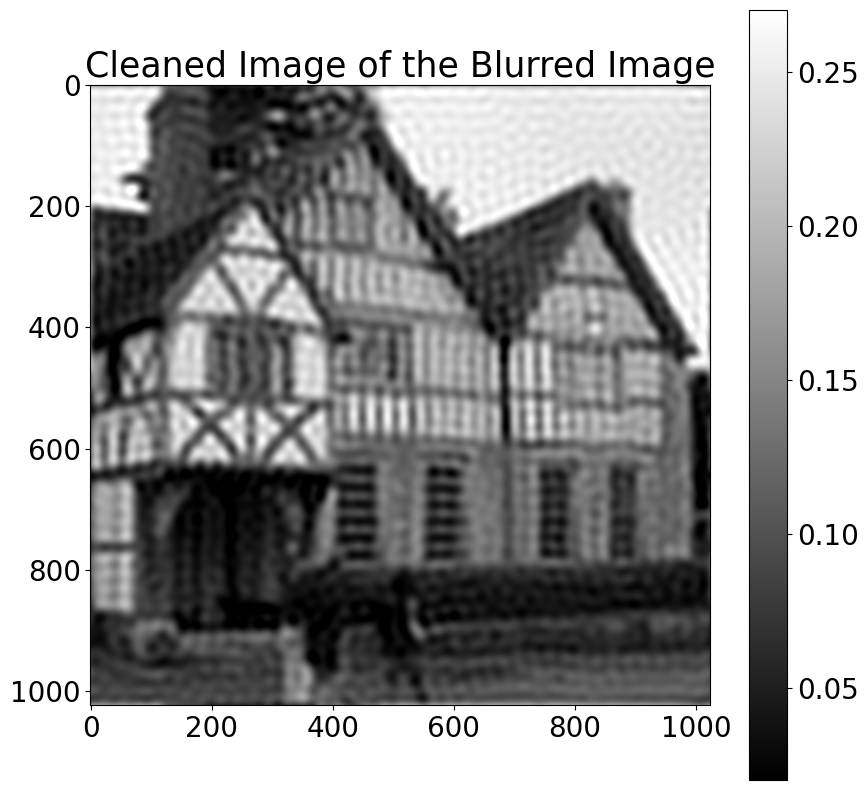

Run time for this cell 3.240823984146118 seconds


In [33]:
start=time()
Go_from_blur_to_clear(Blur_picture=np.genfromtxt('blur.txt'),sigma=25)
end=time()
print('Run time for this cell',end-start,'seconds')

$\textbf{Part d}$

$\textbf{What is it that limits our ability to deblur a photo?}$ 

$\textbf{Comments:}$

In a black white picture each pixel is the intensity (lowest is black and highest is white), frequency can also range from infrared to ultravoilet. As I said above after a certain limit even if we want to take more frequencies into consideration to create a clear picture, we can't as the zeros in the fourier transform of gaussian function limits our abilty to fully inverse transform the result obtained after dividing Fourier transform of image by Fourier transform of point spread function.  